Load a pre-trained model and tokenizer from Hugging Face



In [1]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer
import torch

# Load the pre-trained model and tokenizer
model_name = "distilbert-base-uncased-distilled-squad"
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

c:\Users\noelm\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


question-answering function

In [2]:
def answer_question(question, context):
    inputs = tokenizer(question, context, truncation=True, padding=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits
    answer_start = torch.argmax(answer_start_scores)
    answer_end = torch.argmax(answer_end_scores) + 1
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][answer_start:answer_end]))
    return answer if answer else "No answer found"

context and Qstn

In [14]:
context = """
Climate change refers to significant changes in global temperatures and weather patterns over time. 
While climate change is a natural phenomenon, scientific evidence shows that human activities, particularly the burning of
fossil fuels, deforestation, and industrial processes, have accelerated this change. The impact of climate change includes 
rising sea levels, more frequent and severe weather events, and disruptions to ecosystems and agriculture.
"""

questions = [
    "What is climate change and what are its primary causes?",
    "How does climate change affect weather patterns and sea levels?",
    "What are the potential impacts of climate change on ecosystems and agriculture?"
]


In [15]:
for question in questions:
    answer = answer_question(question, context)
    print(f"Question: {question}")
    print(f"Answer: {answer}\n")

Question: What is climate change and what are its primary causes?
Answer: disruptions to ecosystems and agriculture

Question: How does climate change affect weather patterns and sea levels?
Answer: rising

Question: What are the potential impacts of climate change on ecosystems and agriculture?
Answer: disruptions



Original prompt

In [16]:
original_prompt = "What is machine learning?"
print("Original Prompt Response:")
print(answer_question(original_prompt, context))

Original Prompt Response:
climate change


Optimized prompt with more context

In [17]:
optimized_prompt = "Can you explain what machine learning is in simple terms for a beginner?"
print("\nOptimized Prompt Response:")
print(answer_question(optimized_prompt, context))


Optimized Prompt Response:
No answer found


optimized prompt is too complex making the model difficult to undertsand
This can be due to the optimized prompt being too complex or the model not understanding the more specific request.
Simplify the optimized prompt to make it more understandable.
Let's simplify the optimized prompt to ensure it remains effective while being less complex.

In [18]:
optimized_prompt = "Explain machine learning simply."
print("\nOptimized Prompt Response:")
print(answer_question(optimized_prompt, context))


Optimized Prompt Response:
climate change refers to significant changes in global temperatures and weather patterns over time


By simplifying the optimized prompt, the model might find it easier to identify relevant spans in the context. This approach ensures that the prompt remains effective while reducing complexity.

# Responses from Chatgpt and gemini

Responses from these models are very clear and simplified using relatable anlogies and metaphors

ChatGPT and Gemini, Both models prioritize clarity and simplicity, using metaphors and analogies to explain complex concepts like machine learning.

Both models ensure accessibility by breaking down complex concepts into simpler terms, ensuring that beginners and non-technical users can grasp the fundamental concepts of machine learning.

Distilbert The response from a fine-tuned DistilBERT model would likely be more technically oriented, focusing on precise definitions and mechanisms without the use of creative analogies unless explicitly fine-tuned for such prompts.



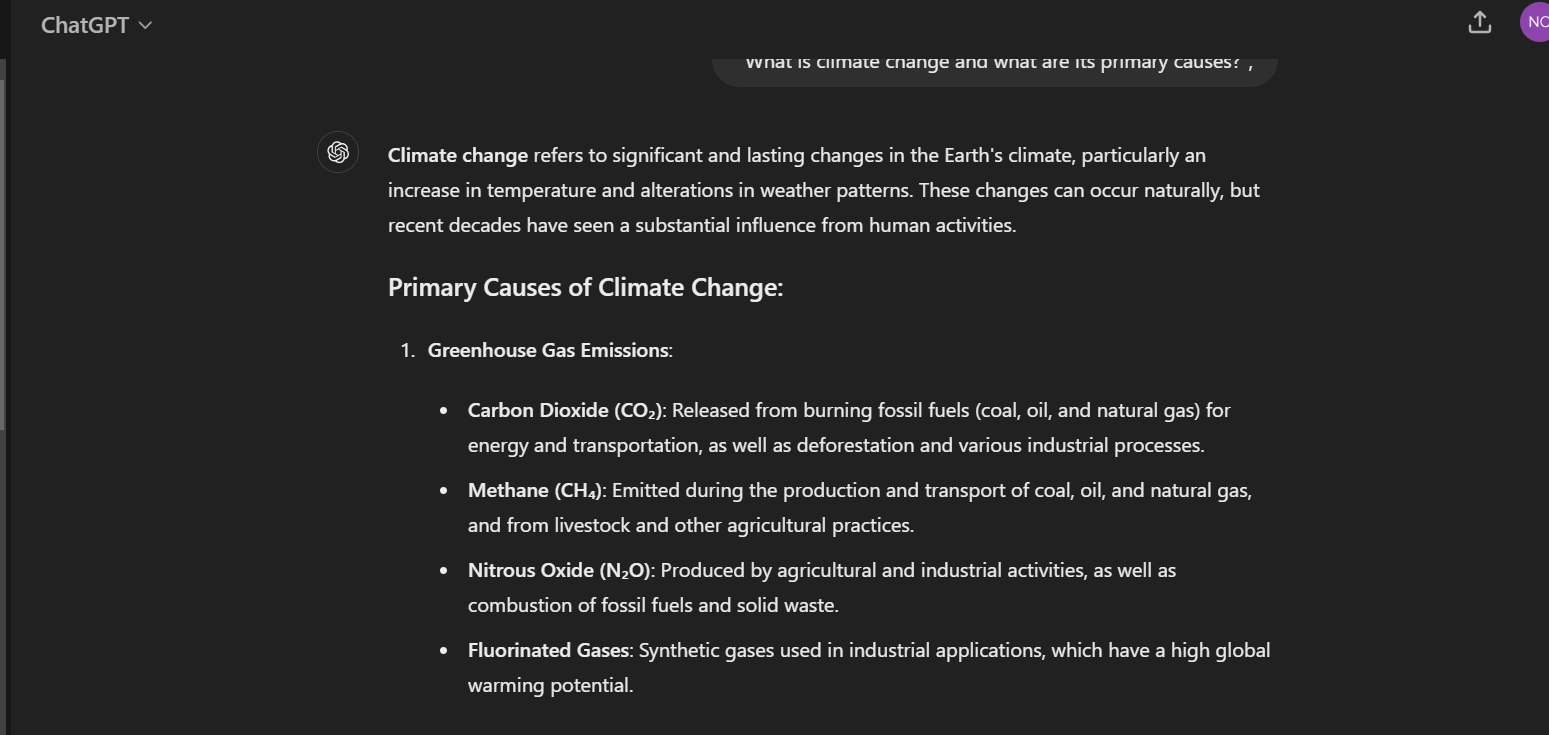